In [1]:
from requests import get
response = get('https://www.ratemyprofessors.com/school/1072')

In [172]:
from bs4 import BeautifulSoup

In [174]:
html_soup = BeautifulSoup(response.text,'html')

In [103]:
review_list = []
review_container = html_soup.find(id='schoolRatingsList')

# let's print our variable, returns a list
print(review_container)

<ul class="SchoolRatingsList__ListContainer-sc-1tg2phb-0 jSdWoM" id="schoolRatingsList"><li><div class="SchoolRating__SchoolRatingContainer-sb9dsm-0 inMLDw"><div class="SchoolRating__SchoolRatingBody-sb9dsm-1 JfJQe"><div class="SchoolRating__OverallRatingContainer-sb9dsm-2 bUrGTi"><div class="SchoolRating__OverallHeader-sb9dsm-3 epZtNQ">Overall</div><div class="GradeSquare__ColoredSquare-sc-6d97x2-0 gqlKUf" color="awesomeScore">4.5</div></div><div class="SchoolRating__MainRatingContainer-sb9dsm-4 rASDq"><div class="SchoolRating__RatingHeader-sb9dsm-5 yjiuU"><div class="TimeStamp__StyledTimeStamp-sc-9q2r30-0 bXQmMr SchoolRating__StyledTimeStamp-sb9dsm-7 bkDMlg">Nov 17th, 2024</div></div><div class="SchoolRating__RatingComment-sb9dsm-6 eNyCKI">great academics, food could be better</div><div><div class="SchoolRatingSummary__SchoolRatingSummaryContainer-sc-50tcmg-0 cNSIDJ"><div class="DisplaySlider__DisplaySliderContainer-sc-6etfq5-0 bIaaU"><div class="DisplaySlider__DisplaySliderLabel-sc-

In [101]:
if review_container:
        # Find all the list items (<li>) within the container
        reviews = review_container.find_all("li")
        
        # Print the text of each review
        for review in reviews:
            review_list.append(review.text.strip())

In [95]:
pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
    --------------------------------------- 0.2/9.7 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.7 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.7 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.7 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.7 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.7 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.7 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.7 MB 4.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.7 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.7 MB 4.2 MB/s eta 0:00:02
   ---------- -------------------

In [272]:
universities = {
    "Princeton University": "780",
    "Massachusetts Institute of Technology": "580",
    "Harvard University": "399",
    "Stanford University": "953",
    "Yale University": "1222",
    "California Institute of Technology": "148",
    "Duke University": "1350",
    "Johns Hopkins University": "464",
    "Northwestern University": "709",
    "University of Pennsylvania": "1275",
    "Cornell University": "298",
    "University of Chicago": "1085",
    "Brown University": "137",
    "Columbia University": "278",
    "Dartmouth College": "1339",
    "University of California-Los Angeles": "1075",
    "University of California-Berkeley": "1072",
    "Rice University": "799",
    "University of Notre Dame": "1576",
    "Vanderbilt University": "4002",
    "Carnegie Mellon University": "181",
    "University of Michigan-Ann Arbor": "1258",
    "Washington University in St. Louis": "1147",
    "Emory University": "340",
    "Georgetown University": "355",
    "University of Virginia": "1277",
    "University of North Carolina-Chapel Hill": "1232",
    "University of Southern California": "1381",
    "University of California-San Diego": "1079",
    "New York University": "675",
    "University of Florida": "1100",
    "University of Texas-Austin": "1255",
    "Georgia Institute of Technology": "361",
    "University of California-Davis": "1073",
    "University of California-Irvine": "1074",
    "University of Illinois-Urbana-Champaign": "1112",
    "Boston College": "122",
    "Tufts University": "1040",
    "University of California-Santa Barbara": "1077",
    "University of Wisconsin-Madison": "18418",
    "Boston University": "124",
    "Ohio State University-Columbus": "724",
    "Rutgers University-New Brunswick": "825",
    "University of Maryland-College Park": "1270",
    "University of Rochester": "1331",
    "Lehigh University": "509",
    "Purdue University": "783",
    "University of Georgia": "1101",
    "University of Washington": "1530",
    "Wake Forest University": "1130"
}

In [162]:
University_tester =  {
    "Princeton University": "780",
    "Massachusetts Institute of Technology": "580"}

# Code With Review Summary at the top of the dataframe

In [274]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

# Set up Selenium WebDriver
driver = webdriver.Chrome()  

# Dictionary to store reviews for each university
university_reviews = {}

def close_pop_up(driver):
    """Function to handle pop-ups."""
    try:
        cookie_button = WebDriverWait(driver, 1).until(
            EC.element_to_be_clickable((By.XPATH, "//*[contains(@class, 'FullPageModal__StyledCloseIcon-sc-1tziext-0 eJtQsN')]"))
        )
        cookie_button.click()
        print("Cookie pop-up closed.")
    except:
        pass  
    
    try:
        ad_button = WebDriverWait(driver, 3).until(
            EC.element_to_be_clickable((By.XPATH, "//*[@id='bx-close-inside-1177612']"))
        )
        ad_button.click()
        print("Ad pop-up closed.")
    except:
        pass 

# Start scraping for each university
for university, university_id in universities.items():
    url = f"https://www.ratemyprofessors.com/school/{university_id}"  
    driver.get(url)
    print(f"Scraping data for {university}...")

    # Close any pop-ups
    close_pop_up(driver)

    try:
        page_source = driver.page_source

        # Use BeautifulSoup to parse the HTML
        soup = BeautifulSoup(page_source, "html.parser")

        # Scrape the summary section (overall average, reputation, etc.)
        summary = {}
        try:
            # Find the overall rating using the updated class
            overall_rating = soup.select_one("div.OverallRating__Number-y66epv-3.dXoyqn")
            summary["Overall Rating"] = overall_rating.text.strip() if overall_rating else None

            # Scrape individual categories (Reputation, Safety, etc.)
            categories = soup.find_all("div", class_="CategoryGrade__CategoryTitle-sc-17vzv7e-1")
            scores = soup.find_all("div", class_="GradeSquare__ColoredSquare-sc-6d97x2-0")
            
            # Create a dictionary for the category labels and their corresponding scores
            for category, score in zip(categories, scores):
                category_name = category.text.strip()
                category_score = score.text.strip()
                summary[category_name] = category_score

        except Exception as e:
            print(f"Failed to scrape summary for {university}: {e}")

        # Scrape the reviews
        reviews = []
        max_attempts = 5  
        attempts = 0

        while attempts < max_attempts:
            try:
                show_more_button = WebDriverWait(driver, 3).until(
                    EC.presence_of_element_located((By.XPATH, "//*[@id='root']/div/div/div[4]/div[5]/button"))
                )
                driver.execute_script("arguments[0].click();", show_more_button)
                close_pop_up(driver)
                attempts += 1
            except:
                print("No more 'Show More' button to click or button not found.")
                break

        # Once all reviews are loaded, parse them
        page_source = driver.page_source

        # Use BeautifulSoup to parse the HTML
        soup = BeautifulSoup(page_source, "html.parser")

        reviews_container = soup.find(id="schoolRatingsList")
        if reviews_container:
            reviews = [review.text.strip() for review in reviews_container.find_all("li")]
            print(f"Scraped {len(reviews)} reviews for {university}.")
        else:
            print(f"No reviews found for {university}.")

        # Store the summary and reviews in the dictionary
        university_reviews[university] = {
            "Summary": summary,
            "Reviews": reviews
        }

    except Exception as e:
        print(f"Failed to scrape {university}: {e}")

# Close the browser after scraping
driver.quit()

# Create the DataFrame
df_dict = {}

# Prepare the data for each university
for university, data in university_reviews.items():
    summary_data = data["Summary"]
    reviews = data["Reviews"]
    
    # Start with the summary as the first row for the university
    column_data = [summary_data]
    
    # Add the reviews as subsequent rows
    column_data.extend(reviews)
    
    # Store this list as the value for the university's column
    df_dict[university] = column_data

# Convert the dictionary of lists to a DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in df_dict.items()]))


df.to_csv("university_summary_and_reviews.csv", index=False)


print(df)


Scraping data for Princeton University...
Cookie pop-up closed.
Ad pop-up closed.
No more 'Show More' button to click or button not found.
Scraped 62 reviews for Princeton University.
Scraping data for Massachusetts Institute of Technology...
Scraped 83 reviews for Massachusetts Institute of Technology.
Scraping data for Harvard University...
Scraped 94 reviews for Harvard University.
Scraping data for Stanford University...
Scraped 94 reviews for Stanford University.
Scraping data for Yale University...
Scraped 86 reviews for Yale University.
Scraping data for California Institute of Technology...
No more 'Show More' button to click or button not found.
Scraped 24 reviews for California Institute of Technology.
Scraping data for Duke University...
Scraped 94 reviews for Duke University.
Scraping data for Johns Hopkins University...
Scraped 94 reviews for Johns Hopkins University.
Scraping data for Northwestern University...
No more 'Show More' button to click or button not found.
Scra

In [314]:
df

,Princeton University,Massachusetts Institute of Technology,Harvard University,Stanford University,Yale University,California Institute of Technology,Duke University,Johns Hopkins University,Northwestern University,University of Pennsylvania,...,Boston University,Ohio State University-Columbus,Rutgers University-New Brunswick,University of Maryland-College Park,University of Rochester,Lehigh University,Purdue University,University of Georgia,University of Washington,Wake Forest University
0,"{'Overall Rating': '4.3', 'Reputation': '4.6',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...","{'Overall Rating': '3.3', 'Reputation': '3.9',...","{'Overall Rating': '4.3', 'Reputation': '4.7',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '3.9', 'Reputation': '4.6',...","{'Overall Rating': '4.6', 'Reputation': '4.9',...","{'Overall Rating': '3.9', 'Reputation': '4.9',...","{'Overall Rating': '4.2', 'Reputation': '4.8',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...",...,"{'Overall Rating': '3.9', 'Location': '4.5', '...","{'Overall Rating': '4.2', 'Reputation': '4.4',...","{'Overall Rating': '3.8', 'Social': '4.1', 'Op...","{'Overall Rating': '3.7', 'Reputation': '4.2',...","{'Overall Rating': '3.7', 'Reputation': '4.3',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '4.2', 'Reputation': '4.7',...","{'Overall Rating': '4.3', 'Facilities': '4.6',...","{'Overall Rating': '3.9', 'Reputation': '4.4',...","{'Overall Rating': '4.3', 'Reputation': '4.7',..."
1,"Overall1.0Apr 12th, 2024Im very smart and this...","Overall5.0Sep 3rd, 2024So good!!!ReputationLoc...","Overall2.7Nov 22nd, 2024Don't go here it's an ...","Overall4.7Nov 17th, 2024nice univ!ReputationLo...","Overall4.5Nov 21st, 2024Without a doubt the gr...","Overall5.0Nov 16th, 2024Nice.ReputationLocatio...","Overall4.9Oct 30th, 2024Great academic support...","Overall2.7Nov 13th, 2024I hate the atmosphere ...","Overall3.5Nov 13th, 2024Overall, this school h...","Overall4.2Sep 23rd, 2024some of the food won't...",...,"Overall3.3Nov 18th, 2024Bu is what you make of...","Overall5.0Nov 6th, 2024I LOVE THIS SCHOOOOOOOO...","Overall3.5Nov 17th, 2024I hate New Jersey, but...","Overall3.8Nov 1st, 2024Safety is not always th...","Overall3.9Nov 23rd, 2024Nice peaceful place to...","Overall4.4Nov 13th, 2024I LOVE IT HEREReputati...","Overall3.4Nov 22nd, 2024I am a second year at ...","Overall4.4Nov 21st, 2024I've never been happie...","Overall3.7Nov 19th, 2024UW is a pretty tough s...","Overall4.8Nov 17th, 2024Great school. The prof..."
2,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,...,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement,Advertisement
3,"Overall4.4Oct 15th, 2020Easier to find people ...","Overall2.4Jun 21st, 2024kReputationLocationOpp...","Overall2.0Nov 17th, 2024As good as a community...","Overall5.0Jul 3rd, 2024YeahReputationLocationO...","Overall3.7Aug 9th, 2024Secret clubs, Harry Pot...","Overall2.2Feb 21st, 2023The party scene is gre...","Overall4.7Jul 1st, 2024best work hard play har...","Overall3.7Oct 22nd, 2024This school has many g...","Overall5.0Feb 20th, 2023Let's just say when yo...","Overall4.8Jul 12th, 2024Idk why's everyone hat...",...,"Overall4.2Nov 17th, 2024Went for grad school. ...","Overall4.8Oct 29th, 2024This school is not an ...","Overall3.5Nov 14th, 2024. Plenty of things to ...","Overall4.8Oct 26th, 2024University of Maryland...","Overall4.9Nov 10th, 2024This school is greatRe...","Overall2.1Aug 2nd, 2024Has a lot of places to ...","Overall3.3Oct 22nd, 2024Purdue is a mixed bag....","Overall4.6Nov 20th, 2024Great opportunities he...","Overall2.5Nov 18th, 2024I graduated last sprin...","Overall4.3Oct 25th, 2024Great school. Lots of ..."
4,"Overall5.0Jan 24th, 2020A great campusReputati...","Overall3.8Jun 6th, 2024The 

In [508]:
test_frame = df.copy()

# Cleaning the Data

In [511]:
# Remove rows containing "Advertisement" in the "University" column
filtered_frame = test_frame[~test_frame.apply(lambda row: row.astype(str).str.contains("Advertisement", case=False, na=False).any(), axis=1)]

In [513]:
import pandas as pd
import re

# Function to parse each review
def parse_review(review):
    if not isinstance(review, str):
        return [None, None, None]  # Return placeholders if the review is invalid

    # Extract rating (e.g., "5.0" after "Overall")
    rating_match = re.search(r'Overall(\d\.\d)', review)
    rating = rating_match.group(1) if rating_match else None
    
    # Extract date (e.g., "Jan 24th, 2020")
    date_match = re.search(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}(st|nd|rd|th)?, \d{4}', review)
    date = date_match.group(0) if date_match else None
    
    # Extract comment (text before keywords like "Reputation")
    comment = re.split(r'Reputation|Location|Opportunities|Facilities|Internet|Food|Clubs|Social|Happiness|Safety|Helpful', review)[0]
    comment = comment.replace(date if date else '', '').replace(f'Overall{rating}' if rating else '', '').strip()
    
    return [date, rating, comment]
# Apply the function to the DataFrame
parsed_reviews = pd.DataFrame({col: filtered_frame[col].iloc[1:].apply(parse_review) for col in filtered_frame.columns})
parsed_reviews = parsed_reviews.apply(
    lambda col: col.apply(
        lambda x: [v.replace('\n', ' ') if isinstance(v, str) else v for v in x]))

parsed_reviews.loc[-1] = filtered_frame.iloc[0]  # This will add the first row back to the top
parsed_reviews.index = parsed_reviews.index + 1  # Reindex the dataframe
parsed_reviews = parsed_reviews.sort_index()  # Sort by index to restore the original order
parsed_reviews.reset_index(drop=True, inplace=True)


In [555]:
parsed_reviews

,Princeton University,Massachusetts Institute of Technology,Harvard University,Stanford University,Yale University,California Institute of Technology,Duke University,Johns Hopkins University,Northwestern University,University of Pennsylvania,...,Boston University,Ohio State University-Columbus,Rutgers University-New Brunswick,University of Maryland-College Park,University of Rochester,Lehigh University,Purdue University,University of Georgia,University of Washington,Wake Forest University
0,"{'Overall Rating': '4.3', 'Reputation': '4.6',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...","{'Overall Rating': '3.3', 'Reputation': '3.9',...","{'Overall Rating': '4.3', 'Reputation': '4.7',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '3.9', 'Reputation': '4.6',...","{'Overall Rating': '4.6', 'Reputation': '4.9',...","{'Overall Rating': '3.9', 'Reputation': '4.9',...","{'Overall Rating': '4.2', 'Reputation': '4.8',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...",...,"{'Overall Rating': '3.9', 'Location': '4.5', '...","{'Overall Rating': '4.2', 'Reputation': '4.4',...","{'Overall Rating': '3.8', 'Social': '4.1', 'Op...","{'Overall Rating': '3.7', 'Reputation': '4.2',...","{'Overall Rating': '3.7', 'Reputation': '4.3',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '4.2', 'Reputation': '4.7',...","{'Overall Rating': '4.3', 'Facilities': '4.6',...","{'Overall Rating': '3.9', 'Reputation': '4.4',...","{'Overall Rating': '4.3', 'Reputation': '4.7',..."
1,"[Apr 12th, 2024, 1.0, Im very smart and this c...","[Sep 3rd, 2024, 5.0, So good!!!]","[Nov 22nd, 2024, 2.7, Don't go here it's an aw...","[Nov 17th, 2024, 4.7, nice univ!]","[Nov 21st, 2024, 4.5, Without a doubt the grea...","[Nov 16th, 2024, 5.0, Nice.]","[Oct 30th, 2024, 4.9, Great academic support a...","[Nov 13th, 2024, 2.7, I hate the atmosphere at...","[Nov 13th, 2024, 3.5, Overall, this school has...","[Sep 23rd, 2024, 4.2, some of the food won't g...",...,"[Nov 18th, 2024, 3.3, Bu is what you make of i...","[Nov 6th, 2024, 5.0, I LOVE THIS SCHOOOOOOOOOO...","[Nov 17th, 2024, 3.5, I hate New Jersey, but I...","[Nov 1st, 2024, 3.8, ]","[Nov 23rd, 2024, 3.9, Nice peaceful place to s...","[Nov 13th, 2024, 4.4, I LOVE IT HERE]","[Nov 22nd, 2024, 3.4, I am a second year at Pu...","[Nov 21st, 2024, 4.4, I've never been happier ...","[Nov 19th, 2024, 3.7, UW is a pretty tough sch...","[Nov 17th, 2024, 4.8, Great school. The profes..."
2,"[Oct 15th, 2020, 4.4, Easier to find people yo...","[Jun 21st, 2024, 2.4, k]","[Nov 17th, 2024, 2.0, As good as a community c...","[Jul 3rd, 2024, 5.0, Yeah]","[Aug 9th, 2024, 3.7, Secret clubs, Harry Potte...","[Feb 21st, 2023, 2.2, The party scene is great...","[Jul 1st, 2024, 4.7, best work hard play hard ...","[Oct 22nd, 2024, 3.7, This school has many gre...","[Feb 20th, 2023, 5.0, Let's just say when you ...","[Jul 12th, 2024, 4.8, Idk why's everyone hatin...",...,"[Nov 17th, 2024, 4.2, Went for grad school. Wo...","[Oct 29th, 2024, 4.8, This school is not an Iv...","[Nov 14th, 2024, 3.5, . Plenty of things to do...","[Oct 26th, 2024, 4.8, University of Maryland i...","[Nov 10th, 2024, 4.9, This school is great]","[Aug 2nd, 2024, 2.1, Has a lot of places to im...","[Oct 22nd, 2024, 3.3, Purdue is a mixed bag. G...","[Nov 20th, 2024, 4.6, Great opportunities here...","[Nov 18th, 2024, 2.5, I graduated last spring....","[Oct 25th, 2024, 4.3, Great school. Lots of re..."
3,"[Jan 24th, 2020, 5.0, A great campus]","[Jun 6th, 2024, 3.8, The university is kind of...","[Nov 12th, 2024, 2.8, Not that good for how mu...","[Jun 13th, 2024, 5.0, Great]","[May 9th, 2024, 4.4, I LOVE THIS SCHOL!!!!]","[Jan 15th, 2020, 3.3, Phenomenal engineering s...","[May 21st, 2024, 4.9, Choosing Duke was one of...","[Jul 14th, 2024, 5.0, fantastic.]","[Sep 9th, 2022, 4.7, I want to write off and c...","[May 19th, 2024, 4.3, im beyond grateful to be...",...,"[Nov 15th, 2024, 4.0, school is chill lots 

In [464]:
parsed_reviews.to_csv("RMP_Data_50_schools.csv", index=False)

# Sentiment Analysis with textblob

In [515]:
!pip install textblob
from textblob import TextBlob
import pandas as pd

# Initialize a dictionary to store polarity scores for each university
polarity_scores = {}

# Iterate over each university in the parsed_reviews DataFrame
for university in parsed_reviews.columns:
    # Skip the summary row (index 0) and calculate polarity for each review
    polarity_scores[university] = parsed_reviews[university][1:].apply(
        lambda review: (
            TextBlob(review[2]).sentiment.polarity
            if isinstance(review, list) and len(review) > 2 and isinstance(review[2], str)
            else None
        )
    ).values

# Convert polarity_scores dictionary to a DataFrame
polarity_df = pd.DataFrame(polarity_scores, index=parsed_reviews.index[1:])

# Rename polarity_df columns to append "_Polarity"
polarity_df = polarity_df.rename(columns=lambda x: x + '_Polarity')

# Remove duplicate or redundant polarity columns from previous runs
textblob_analysis = parsed_reviews.loc[:, ~parsed_reviews.columns.str.endswith('_Polarity')]

# Concatenate the polarity_df with parsed_reviews
textblob_analysis = pd.concat([parsed_reviews, polarity_df], axis=1)

In [521]:
textblob_analysis

,Princeton University,Massachusetts Institute of Technology,Harvard University,Stanford University,Yale University,California Institute of Technology,Duke University,Johns Hopkins University,Northwestern University,University of Pennsylvania,...,Boston University_Polarity,Ohio State University-Columbus_Polarity,Rutgers University-New Brunswick_Polarity,University of Maryland-College Park_Polarity,University of Rochester_Polarity,Lehigh University_Polarity,Purdue University_Polarity,University of Georgia_Polarity,University of Washington_Polarity,Wake Forest University_Polarity
0,"{'Overall Rating': '4.3', 'Reputation': '4.6',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...","{'Overall Rating': '3.3', 'Reputation': '3.9',...","{'Overall Rating': '4.3', 'Reputation': '4.7',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '3.9', 'Reputation': '4.6',...","{'Overall Rating': '4.6', 'Reputation': '4.9',...","{'Overall Rating': '3.9', 'Reputation': '4.9',...","{'Overall Rating': '4.2', 'Reputation': '4.8',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Apr 12th, 2024, 1.0, Im very smart and this c...","[Sep 3rd, 2024, 5.0, So good!!!]","[Nov 22nd, 2024, 2.7, Don't go here it's an aw...","[Nov 17th, 2024, 4.7, nice univ!]","[Nov 21st, 2024, 4.5, Without a doubt the grea...","[Nov 16th, 2024, 5.0, Nice.]","[Oct 30th, 2024, 4.9, Great academic support a...","[Nov 13th, 2024, 2.7, I hate the atmosphere at...","[Nov 13th, 2024, 3.5, Overall, this school has...","[Sep 23rd, 2024, 4.2, some of the food won't g...",...,0.366667,0.500000,0.167273,0.000000,0.425000,0.500000,0.008333,0.450000,0.301247,0.490000
2,"[Oct 15th, 2020, 4.4, Easier to find people yo...","[Jun 21st, 2024, 2.4, k]","[Nov 17th, 2024, 2.0, As good as a community c...","[Jul 3rd, 2024, 5.0, Yeah]","[Aug 9th, 2024, 3.7, Secret clubs, Harry Potte...","[Feb 21st, 2023, 2.2, The party scene is great...","[Jul 1st, 2024, 4.7, best work hard play hard ...","[Oct 22nd, 2024, 3.7, This school has many gre...","[Feb 20th, 2023, 5.0, Let's just say when you ...","[Jul 12th, 2024, 4.8, Idk why's everyone hatin...",...,0.433333,0.258838,0.198611,0.500000,0.800000,0.000000,0.258333,0.396667,0.000000,0.220833
3,"[Jan 24th, 2020, 5.0, A great campus]","[Jun 6th, 2024, 3.8, The university is kind of...","[Nov 12th, 2024, 2.8, Not that good for how mu...","[Jun 13th, 2024, 5.0, Great]","[May 9th, 2024, 4.4, I LOVE THIS SCHOL!!!!]","[Jan 15th, 2020, 3.3, Phenomenal engineering s...","[May 21st, 2024, 4.9, Choosing Duke was one of...","[Jul 14th, 2024, 5.0, fantastic.]","[Sep 9th, 2022, 4.7, I want to write off and c...","[May 19th, 2024, 4.3, im beyond grateful to be...",...,-0.075000,-0.111111,0.700000,0.600000,0.268750,0.212500,0.010000,0.444444,0.475000,0.650000
4,"[Aug 2nd, 2018, 3.8, Amazing place to study. O...","[May 15th, 2024, 5.0, GOAT]","[Nov 9th, 2024, 5.0, Its awsome]","[Mar 13th, 2024, 5.0, Great school, great Coms...","[Feb 9th, 2024, 4.4, Good]","[Feb 8th, 2019, 3.8, Good!_!]","[May 5th, 2024, 5.0, Brilliant school, with wo...","[May 17th, 2024, 4.5, Completed MS in Technica...","[Jan 2nd, 2022, 4.1, Northwestern is simply am...","[Apr 3rd, 2024, 2.5, Penn's reputation with st...",...,0.150000,0.580000,0.050000,0.781250,0.400000,0.000000,0.005714,0.300000,0.875000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"[None, None, None]","[None, None, None]","[Jun 6th, 2018, 3.6, I could have used more of...","[Sep 27th, 2014, 4.5, I 3 Stanford]","[None, None, None]","[None, None, None]","[Oct 30th, 2018, 4.7, Amazing school for mix o...","[Jan 27th, 2015, 4.2, Play hard, study hard.]","[None, None, None]","[Aug 7th, 2011, 4.5, None.]",...,0.000000,0.000000,0.314286,0.000000,0.166667,0.100000,0.700000,0.345000,0.400000,0.700000
67,"[None, None, None]","[None, None, None]","[May 30th, 2018, 3.6, this school is so overra...","[Aug 25th, 2014

# VADAR Sentiment Analysis

In [528]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Create a dictionary to store polarity scores for each university
polarity_scores = {}

# Iterate through each university column in the DataFrame
for university in parsed_reviews.columns:
    # Skip the summary row (index 0) and calculate polarity for reviews
    polarity_scores[university] = parsed_reviews[university][1:].apply(
        lambda review: (
            sia.polarity_scores(review[2])['compound']
            if isinstance(review, list) and len(review) > 2 and isinstance(review[2], str)
            else None
        )
    ).values

# Convert polarity_scores dictionary to a DataFrame
polarity_df = pd.DataFrame(polarity_scores, index=parsed_reviews.index[1:])

# Add polarity scores to the original parsed_reviews DataFrame
# Rename polarity_df columns to append "_Polarity" only once
polarity_df = polarity_df.rename(columns=lambda x: x + '_Polarity')

# Remove duplicate or redundant polarity columns from previous runs
Vadar_analysis = parsed_reviews.loc[:, ~parsed_reviews.columns.str.endswith('_Polarity')]
Vadar_analysis = pd.concat([parsed_reviews, polarity_df], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jeanf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [532]:
Vadar_analysis

,Princeton University,Massachusetts Institute of Technology,Harvard University,Stanford University,Yale University,California Institute of Technology,Duke University,Johns Hopkins University,Northwestern University,University of Pennsylvania,...,Boston University_Polarity,Ohio State University-Columbus_Polarity,Rutgers University-New Brunswick_Polarity,University of Maryland-College Park_Polarity,University of Rochester_Polarity,Lehigh University_Polarity,Purdue University_Polarity,University of Georgia_Polarity,University of Washington_Polarity,Wake Forest University_Polarity
0,"{'Overall Rating': '4.3', 'Reputation': '4.6',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...","{'Overall Rating': '3.3', 'Reputation': '3.9',...","{'Overall Rating': '4.3', 'Reputation': '4.7',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '3.9', 'Reputation': '4.6',...","{'Overall Rating': '4.6', 'Reputation': '4.9',...","{'Overall Rating': '3.9', 'Reputation': '4.9',...","{'Overall Rating': '4.2', 'Reputation': '4.8',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Apr 12th, 2024, 1.0, Im very smart and this c...","[Sep 3rd, 2024, 5.0, So good!!!]","[Nov 22nd, 2024, 2.7, Don't go here it's an aw...","[Nov 17th, 2024, 4.7, nice univ!]","[Nov 21st, 2024, 4.5, Without a doubt the grea...","[Nov 16th, 2024, 5.0, Nice.]","[Oct 30th, 2024, 4.9, Great academic support a...","[Nov 13th, 2024, 2.7, I hate the atmosphere at...","[Nov 13th, 2024, 3.5, Overall, this school has...","[Sep 23rd, 2024, 4.2, some of the food won't g...",...,0.5994,0.6369,0.9604,0.0000,0.7184,0.6369,0.1027,0.6499,0.9770,0.9043
2,"[Oct 15th, 2020, 4.4, Easier to find people yo...","[Jun 21st, 2024, 2.4, k]","[Nov 17th, 2024, 2.0, As good as a community c...","[Jul 3rd, 2024, 5.0, Yeah]","[Aug 9th, 2024, 3.7, Secret clubs, Harry Potte...","[Feb 21st, 2023, 2.2, The party scene is great...","[Jul 1st, 2024, 4.7, best work hard play hard ...","[Oct 22nd, 2024, 3.7, This school has many gre...","[Feb 20th, 2023, 5.0, Let's just say when you ...","[Jul 12th, 2024, 4.8, Idk why's everyone hatin...",...,0.7339,0.9300,0.8765,0.7783,0.6249,0.4404,0.3685,0.9061,-0.7320,0.7208
3,"[Jan 24th, 2020, 5.0, A great campus]","[Jun 6th, 2024, 3.8, The university is kind of...","[Nov 12th, 2024, 2.8, Not that good for how mu...","[Jun 13th, 2024, 5.0, Great]","[May 9th, 2024, 4.4, I LOVE THIS SCHOL!!!!]","[Jan 15th, 2020, 3.3, Phenomenal engineering s...","[May 21st, 2024, 4.9, Choosing Duke was one of...","[Jul 14th, 2024, 5.0, fantastic.]","[Sep 9th, 2022, 4.7, I want to write off and c...","[May 19th, 2024, 4.3, im beyond grateful to be...",...,0.5742,-0.6381,0.4404,0.5859,0.3678,0.7339,0.8750,0.8176,0.8225,0.9080
4,"[Aug 2nd, 2018, 3.8, Amazing place to study. O...","[May 15th, 2024, 5.0, GOAT]","[Nov 9th, 2024, 5.0, Its awsome]","[Mar 13th, 2024, 5.0, Great school, great Coms...","[Feb 9th, 2024, 4.4, Good]","[Feb 8th, 2019, 3.8, Good!_!]","[May 5th, 2024, 5.0, Brilliant school, with wo...","[May 17th, 2024, 4.5, Completed MS in Technica...","[Jan 2nd, 2022, 4.1, Northwestern is simply am...","[Apr 3rd, 2024, 2.5, Penn's reputation with st...",...,0.7901,0.9081,0.7717,0.6988,0.0511,0.0000,-0.8147,0.4922,0.8910,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"[None, None, None]","[None, None, None]","[Jun 6th, 2018, 3.6, I could have used more of...","[Sep 27th, 2014, 4.5, I 3 Stanford]","[None, None, None]","[None, None, None]","[Oct 30th, 2018, 4.7, Amazing school for mix o...","[Jan 27th, 2015, 4.2, Play hard, study hard.]","[None, None, None]","[Aug 7th, 2011, 4.5, None.]",...,0.0000,0.0000,0.9628,0.0000,0.2003,0.4754,0.5859,0.6794,0.9124,0.4404
67,"[None, None, None]","[None, None, None]","[May 30th, 2018, 3.6, this school is so overra...","[Aug 25th, 2014, 4.0, its awesome]","[None, None, None]","[None, None, None]","[Oct 25th, 2018, 4.6, MANY MANY thi

# Transformer-Based Models Sentiment Analysis

In [579]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [593]:
from transformers import pipeline
import pandas as pd

# Load the pre-trained sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to analyze sentiment of individual reviews
def analyze_sentiment(review):
    # Only analyze reviews that are valid (not "Not Specified", "None", or empty)
    if isinstance(review, str):
        review = review.strip().lower()
        # Check if the review is one of the invalid ones
        if review not in ["not specified", "none", "", "Not Specified.", "None."]:
            result = sentiment_analyzer(review)[0]  # Perform sentiment analysis
            return result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return 0  # Return neutral sentiment for invalid or unspecified reviews

# Copy the parsed_reviews DataFrame to avoid modifying it
combined_df = parsed_reviews.copy()

# Add sentiment analysis scores as new columns for each university
for university in parsed_reviews.columns:
    # Create a new column for sentiment scores
    sentiment_scores = parsed_reviews[university][1:].apply(
        lambda x: analyze_sentiment(x[2]) if isinstance(x, list) and len(x) > 2 and x[2] not in ["Not Specified", "None", "", "Not Specified.", "None."] else 0
    )
    
    # Insert the new column into the combined_df with a suffix "_Sentiment_Score"
    combined_df[university + "_Sentiment_Score"] = [None] + sentiment_scores.tolist()

In [832]:
combined_df[['Harvard University', 'Harvard University_Sentiment_Score']].sort_values(by='Harvard University_Sentiment_Score').head(50)

,Harvard University,Harvard University_Sentiment_Score
45,"[Apr 27th, 2020, 1.0, The Worst]",-0.999800
55,"[Oct 29th, 2019, 1.0, Worst place ever]",-0.999782
50,"[Jan 17th, 2020, 1.0, WORST school ever!!]",-0.999753
43,"[Apr 30th, 2020, 1.0, This place stinks should...",-0.999732
36,"[Nov 25th, 2020, 1.5, I hated my experience at...",-0.999712
28,"[Aug 6th, 2022, 2.5, Summer program is pure he...",-0.999697
20,"[Apr 26th, 2023, 1.7, They serve gruel for lun...",-0.999554
41,"[May 18th, 2020, 2.8, Everyone here is depress...",-0.999465
24,"[Mar 15th, 2023, 1.0, Unfortunately, I found H...",-0.999311
47,"[Jan 23rd, 2020, 1.0, I hate this school with ...",-0.999204


# Sentiment Analysis Vadar Lexicon Assignment

In [341]:
#Opening vader lexicon as a dataframe with columns of word, polarity, other1, other2
Vader_data = pd.read_csv('vader_lexicon.txt',names=['word','polarity','other1','other2'],sep ='\t')

#Making the 'word' column the index column
Vader_data = Vader_data.set_index('word')
#Removing the last two columns from the dataframe
lexicon = Vader_data.drop(columns = ['other1','other2'], axis=1)


# View DataFame
lexicon.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [345]:
# Function to process reviews and convert them to lowercase
def lowercase_reviews(row):
    # Skip rows where the cell contains the summary (dictionary) or is not a list
    if isinstance(row, list) and len(row) > 2:  # Checks if it's [Date, Rating, Comment]
        row[2] = row[2].lower() if isinstance(row[2], str) else row[2]
    return row

# Apply the function to each column, skipping the first row (summary)
for col in parsed_reviews.columns:
    parsed_reviews.loc[1:, col] = parsed_reviews.loc[1:, col].apply(lowercase_reviews)

In [351]:
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Function to remove punctuation from reviews
def remove_punctuation(row):
    # Skip rows where the cell contains the summary (dictionary) or is not a list
    if isinstance(row, list) and len(row) > 2:  # Ensure the structure is [Date, Rating, Comment]
        if isinstance(row[2], str):  # Ensure the third item (review) is a string
            row[2] = ''.join(char for char in row[2] if char not in punctuations)
    return row

# Apply the function to each column, skipping the first row (summary)
for col in parsed_reviews.columns:
    parsed_reviews.loc[1:, col] = parsed_reviews.loc[1:, col].apply(remove_punctuation)

In [387]:
RMP_sentiment_analysis = parsed_reviews.copy()

In [389]:
import pandas as pd

# Creating an empty dictionary to hold the polarity scores for each university
review_polarity = {}

# Iterate through each university column in the parsed_reviews DataFrame
for university in RMP_sentiment_analysis.columns:
    # Extract reviews (skip the summary row)
    reviews = RMP_sentiment_analysis[university][1:]
    
    # Flatten reviews to process words
    word_lookup = pd.DataFrame()
    word_lookup['review'] = reviews.apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else None)  # Extract review text
    word_lookup.dropna(inplace=True)  # Drop rows with no review
    
    # Split reviews into individual words
    word_lookup['word'] = word_lookup['review'].apply(lambda x: x.split())
    word_lookup = word_lookup.explode('word').reset_index()  # Explode each word into a row
    
    # Lookup word polarity using lexicon (replace with your actual lexicon DataFrame)
    word_lookup = pd.merge(word_lookup, lexicon[['polarity']], on='word', how='left')
    word_lookup.fillna(0, inplace=True)  # Replace NaN polarity values with 0
    
    # Group by index (review ID) and sum polarity scores for each review
    polarity = word_lookup.groupby('index')[['polarity']].sum()
    
    # Ensure the length of polarity matches the reviews
    polarity_values = list(polarity['polarity'].values)
    while len(polarity_values) < len(reviews):
        polarity_values.append(0)  # Pad with zeros if necessary
    
    # Assign polarity scores back to the university reviews DataFrame
    column_name = university + '_Polarity'
    RMP_sentiment_analysis[column_name] = None  # Create the column first
    RMP_sentiment_analysis.loc[1:len(polarity_values), column_name] = polarity_values

# Final DataFrame with polarity scores for each university
print(RMP_sentiment_analysis)


                                 Princeton University  \
0   {'Overall Rating': '4.3', 'Reputation': '4.6',...   
1   [Apr 12th, 2024, 1.0, im very smart and this c...   
2   [Oct 15th, 2020, 4.4, easier to find people yo...   
3               [Jan 24th, 2020, 5.0, a great campus]   
4   [Aug 2nd, 2018, 3.8, amazing place to study ov...   
..                                                ...   
66                                 [None, None, None]   
67                                 [None, None, None]   
68                                 [None, None, None]   
69                                 [None, None, None]   
70                                 [None, None, None]   

                Massachusetts Institute of Technology  \
0   {'Overall Rating': '4.0', 'Reputation': '4.5',...   
1                       [Sep 3rd, 2024, 5.0, so good]   
2                            [Jun 21st, 2024, 2.4, k]   
3   [Jun 6th, 2024, 3.8, the university is kind of...   
4                         [May

In [421]:
RMP_sentiment_analysis

,Princeton University,Massachusetts Institute of Technology,Harvard University,Stanford University,Yale University,California Institute of Technology,Duke University,Johns Hopkins University,Northwestern University,University of Pennsylvania,...,Ohio State University-Columbus_Polarity,Rutgers University-New Brunswick_Polarity,University of Maryland-College Park_Polarity,University of Rochester_Polarity,Lehigh University_Polarity,Purdue University_Polarity,University of Georgia_Polarity,University of Washington_Polarity,Wake Forest University_Polarity,Princeton University_Polarity_Polarity
0,"{'Overall Rating': '4.3', 'Reputation': '4.6',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...","{'Overall Rating': '3.3', 'Reputation': '3.9',...","{'Overall Rating': '4.3', 'Reputation': '4.7',...","{'Overall Rating': '4.1', 'Reputation': '4.5',...","{'Overall Rating': '3.9', 'Reputation': '4.6',...","{'Overall Rating': '4.6', 'Reputation': '4.9',...","{'Overall Rating': '3.9', 'Reputation': '4.9',...","{'Overall Rating': '4.2', 'Reputation': '4.8',...","{'Overall Rating': '4.0', 'Reputation': '4.5',...",...,None,None,None,None,None,None,None,None,None,None
1,"[Apr 12th, 2024, 1.0, im very smart and this c...","[Sep 3rd, 2024, 5.0, so good]","[Nov 22nd, 2024, 2.7, dont go here its an awfu...","[Nov 17th, 2024, 4.7, nice univ]","[Nov 21st, 2024, 4.5, without a doubt the grea...","[Nov 16th, 2024, 5.0, nice]","[Oct 30th, 2024, 4.9, great academic support a...","[Nov 13th, 2024, 2.7, i hate the atmosphere at...","[Nov 13th, 2024, 3.5, overall this school has ...","[Sep 23rd, 2024, 4.2, some of the food wont ge...",...,3.2,7.1,0.0,4.0,3.2,0.4,5.2,17.2,9.2,0
2,"[Oct 15th, 2020, 4.4, easier to find people yo...","[Jun 21st, 2024, 2.4, k]","[Nov 17th, 2024, 2.0, as good as a community c...","[Jul 3rd, 2024, 5.0, yeah]","[Aug 9th, 2024, 3.7, secret clubs harry potter...","[Feb 21st, 2023, 2.2, the party scene is great...","[Jul 1st, 2024, 4.7, best work hard play hard ...","[Oct 22nd, 2024, 3.7, this school has many gre...","[Feb 20th, 2023, 5.0, lets just say when you c...","[Jul 12th, 2024, 4.8, idk whys everyone hating...",...,9.8,4.7,4.8,3.1,1.9,15.2,8.0,1.7,10.9,0
3,"[Jan 24th, 2020, 5.0, a great campus]","[Jun 6th, 2024, 3.8, the university is kind of...","[Nov 12th, 2024, 2.8, not that good for how mu...","[Jun 13th, 2024, 5.0, great]","[May 9th, 2024, 4.4, i love this schol]","[Jan 15th, 2020, 3.3, phenomenal engineering s...","[May 21st, 2024, 4.9, choosing duke was one of...","[Jul 14th, 2024, 5.0, fantastic]","[Sep 9th, 2022, 4.7, i want to write off and c...","[May 19th, 2024, 4.3, im beyond grateful to be...",...,-0.4,1.9,2.8,7.1,5.0,8.8,5.5,5.6,5.4,0
4,"[Aug 2nd, 2018, 3.8, amazing place to study ov...","[May 15th, 2024, 5.0, goat]","[Nov 9th, 2024, 5.0, its awsome]","[Mar 13th, 2024, 5.0, great school great comsc...","[Feb 9th, 2024, 4.4, good]","[Feb 8th, 2019, 3.8, good]","[May 5th, 2024, 5.0, brilliant school with won...","[May 17th, 2024, 4.5, completed ms in technica...","[Jan 2nd, 2022, 4.1, northwestern is simply am...","[Apr 3rd, 2024, 2.5, penns reputation with stu...",...,10.8,4.7,3.2,4.2,0.0,2.6,2.8,7.6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"[None, None, None]","[None, None, None]","[Jun 6th, 2018, 3.6, i could have used more of...","[Sep 27th, 2014, 4.5, i 3 stanford]","[None, None, None]","[None, None, None]","[Oct 30th, 2018, 4.7, amazing school for mix o...","[Jan 27th, 2015, 4.2, play hard study hard]","[None, None, None]","[Aug 7th, 2011, 4.5, none]",...,0.0,13.4,0.0,0.5,1.8,2.8,3.0,7.5,1.9,0
67,"[None, None, None]","[None, None, None]","[May 30th, 2018, 3.6, this school is so overra...","[Aug 25th, 2014, 4.0, its awesome]","[None, None, None]","[None, None, None]","[Oct 25th, 2018, 4.6, many many things to do i...","[Jan 15th, 2015, 3.7, the overall campus life ...","[None, None, None]","[Aug 7th, 2011, 4.4, one of the best out there]",...,6.7,1.9,

In [393]:
RMP_sentiment_analysis.to_csv("RMP_Sentiment_Analysis.csv", index=False)

In [ ]:
RMP_sentiment_analysis[['Ohio State University-Columbus', 'Ohio State University-Columbus_Polarity']].sort_values(by='Ohio State University-Columbus_Polarity').head(40)

# Word cloud code for university

In [837]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.6 MB/s eta 0:00:00



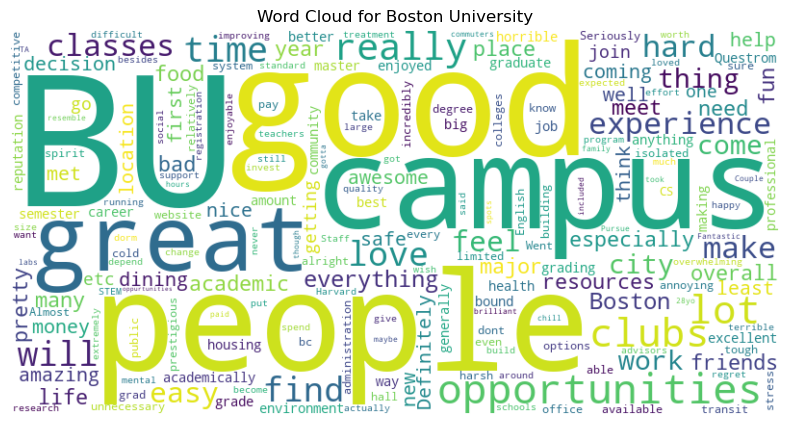

In [871]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(parsed_reviews, university):
    # Extract reviews for the given university starting from the second row
    reviews = parsed_reviews[university].iloc[1:].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else None)
    
    # Combine all the reviews into a single string
    all_reviews = ' '.join(filter(None, reviews))
    
    # Define custom stopwords (optional) and include default ones
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(["university", "student", "students", "college",
                             "school", "class", "professor", 'professors', university, 'None',
                            'Specified', 'everyone'])  # Add your custom stopwords here
    
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='viridis', 
        stopwords=custom_stopwords
    ).generate(all_reviews)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {university}")
    plt.show()

# Example: Generate a word cloud for a specific university
generate_word_cloud(parsed_reviews, "Boston University")


# Combining Data into a Clean DataFrame :)

Getting the summary info data

In [821]:
# Function to create a summary DataFrame by extracting all dictionary data
def create_summary_dataframe(parsed_reviews):
    # Initialize an empty dictionary to store the summary data
    summary_data = {}

    # Iterate through each university column in parsed_reviews
    for university in parsed_reviews.columns:
        # Extract the summary row (first row) for the university (i.e., the first review in the list)
        summary_row = parsed_reviews[university][0]  # Assuming the first element is a dictionary
        
        # Check if summary_row is a dictionary
        if isinstance(summary_row, dict):
            # Store the entire dictionary of summary data for this university
            summary_data[university] = summary_row

    # Convert the dictionary to a DataFrame, with universities as the index
    summary_df = pd.DataFrame.from_dict(summary_data, orient='index')

    return summary_df

# Assuming parsed_reviews is your original DataFrame
summary_df = create_summary_dataframe(parsed_reviews)

Getting the average sentiment score 

In [828]:
def add_sentiment_to_summary(parsed_reviews, summary_df):
    # Extract the sentiment score columns (assuming they are already present in parsed_reviews)
    sentiment_columns = [col for col in parsed_reviews.columns if 'Sentiment' in col]  # Filter sentiment columns by name

    # Exclude the first row (summary row) and calculate the average sentiment for each university (row)
    avg_sentiment_scores = parsed_reviews[sentiment_columns].iloc[1:].replace(0, pd.NA).mean(skipna=True)  # Calculate the mean, excluding the first row

    # Add the average sentiment scores as a new column in the summary_df
    summary_df['Average Sentiment'] = avg_sentiment_scores.tolist() # Add None for the summary row

    return summary_df

# Assuming parsed_reviews is your original DataFrame with sentiment columns
summary_df_with_sentiment = add_sentiment_to_summary(combined_df, summary_df)

In [830]:
summary_df_with_sentiment

,Overall Rating,Reputation,Safety,Facilities,Opportunities,Happiness,Location,Social,Food,Clubs,Internet,Average Sentiment
Princeton University,4.3,4.6,4.5,4.4,4.4,4.3,4.2,4.1,4.1,4.1,4.0,0.626460
Massachusetts Institute of Technology,4.0,4.5,4.5,3.7,4.4,3.8,4.3,3.7,3.3,3.7,4.3,0.631270
Harvard University,3.3,3.9,3.2,3.2,3.5,3.0,3.2,2.9,3.2,3.0,3.2,0.035685
Stanford University,4.3,4.7,4.5,4.5,4.6,4.2,4.4,4.0,3.8,4.0,4.3,0.604507
Yale University,4.1,4.5,3.6,4.1,4.3,4.1,3.4,4.0,3.9,3.9,4.0,0.623912
California Institute of Technology,3.9,4.6,4.2,4.3,4.1,3.9,4.0,3.6,2.8,3.3,4.2,0.686844
Duke University,4.6,4.9,4.4,4.8,4.7,4.6,4.1,4.4,4.1,4.4,4.5,0.796632
Johns Hopkins University,3.9,4.9,3.2,4.3,4.3,3.8,3.6,3.3,3.5,3.8,4.0,0.417095
Northwestern University,4.2,4.8,4.3,4.3,4.5,4.1,4.2,3.7,3.6,3.9,4.3,0.604272
University of Pennsylvania,4.0,4.5,3.5,4.2,4.4,3.9,4.3,4.2,3.4,4.1,4.2,0.383282


In [738]:
summary_df = summary_df.drop(columns=['Overall Rating', 'Reputation', 'Opportunities', 'Happiness', 'Food', 'Clubs', 'Internet', 'Location'])

In [748]:
summary_df = summary_df.reset_index()

# Renaming the column if necessary
summary_df.rename(columns={'index': 'University'}, inplace=True)

In [752]:
summary_df.to_csv("RMP_Data_Clean_Organized.csv", index=False)